# Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#import data
data = pd.read_csv('flavors_of_cacao.csv')

#check
data.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


# Data Overview

In [3]:
#get dimensions
data.shape

(1795, 9)

In [6]:
#get info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [7]:
#check for duplicates
data.duplicated().sum()

0

In [9]:
#check for nulls
data.isna().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

Performing an overview of the data provides a sense of the size of the data, the features and their data types, the number of duplicates and nulls if any. This is a crucial steps as it provides an inital guide to cleaning and exploring the data

# EDA - cleaning included here

In [4]:
# make a copy to make cahnges to
data_copy = data.copy()

In [5]:
# The feature names are a little wonky, so let's change those first

def replace_char(string, char_to_remove, replacement):
    if char_to_remove in string:
        string = string.replace(char_to_remove, replacement)
    return string

new_columns = [] #empty list to append new name
for column in data_copy.columns:
    new_column = replace_char(column, "\n", " ") # replace char with space
    new_columns.append(new_column) # append new column to list

data_copy.columns = new_columns # assign new names to columns in df

data_copy.columns #check work

Index(['Company  (Maker-if known)', 'Specific Bean Origin or Bar Name', 'REF',
       'Review Date', 'Cocoa Percent', 'Company Location', 'Rating',
       'Bean Type', 'Broad Bean Origin'],
      dtype='object')

The documentation on [Kaggle](https://www.kaggle.com/datasets/rtatman/chocolate-bar-ratings?resource=download) indicates there are empty values in the Bean Type column, but our null check didn't pick up on it so let's explore that a bit.

In [17]:
# double check nulls
data_copy.isna().sum()

Company  (Maker-if known)           0
Specific Bean Origin or Bar Name    0
REF                                 0
Review Date                         0
Cocoa Percent                       0
Company Location                    0
Rating                              0
Bean Type                           1
Broad Bean Origin                   1
dtype: int64

In [23]:
# check to value counts for bean type
data_copy['Bean Type'].value_counts() 

Bean Type
                            887
Trinitario                  419
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
Nacional (Arriba)             3
Matina                        3
EET                           3
Beniano                       3
Criollo (Ocumare 61)          2
Trinitario, Forastero         2
Trinitario (85% Criollo)      2
Forastero (Catongo)           2
Criollo, Forastero            2
Amazon, ICS                   2
Criollo (Amarru)              2
Amazon mix                    2
Nacional                      2
Criollo (Ocumare)             1
Criollo (Ocumare 67)          1
Trinitario, TCGA              1
Trinitario (Amelonado)        1
Trinitario, Nacional          1
Forastero (Amelonado)         

In [25]:
#get random sample of data for sanity check
data_copy.sample(10)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
451,Coppeneur,Madagascar,959,2012,70%,Germany,3.50,Trinitario,Madagascar
1190,Nova Monda,"La Patriota, cacao Indio, purple label",931,2012,70%,Nicaragua,3.00,,Nicaragua
502,Danta,Las Acacias E.,987,2012,70%,Guatemala,4.00,Criollo,Guatemala
202,Bittersweet Origins,Puerto Plata,414,2009,65%,U.S.A.,3.50,,Dominican Republic
1340,Pump Street Bakery,"Crayfish Bay Estate, 2014",1502,2015,70%,U.K.,3.50,Trinitario,Grenada
1760,Xocolla,"Hispaniola, batch 170104",1948,2017,70%,U.S.A.,2.50,,Dominican Republic
832,Hotel Chocolat (Coppeneur),"Somia Plantation, Akesson, 2012",1065,2013,72%,U.K.,3.00,Trinitario,Madagascar
847,Hotel Chocolat (Coppeneur),Uba Budo,300,2008,72%,U.K.,3.00,Forastero,Sao Tome
274,Burnt Fork Bend,Trinidad,1299,2014,72%,U.S.A.,3.25,Trinitario,Trinidad
1562,Spagnvola,AgroCriso Plantation,793,2012,70%,U.S.A.,3.00,,Dominican Republic


In [29]:
#check unique values for feature
data_copy['Bean Type'].unique()

# \xa0 is the culprit

array(['\xa0', 'Criollo', 'Trinitario', 'Forastero (Arriba)', 'Forastero',
       'Forastero (Nacional)', 'Criollo, Trinitario',
       'Criollo (Porcelana)', 'Blend', 'Trinitario (85% Criollo)',
       'Forastero (Catongo)', 'Forastero (Parazinho)',
       'Trinitario, Criollo', 'CCN51', 'Criollo (Ocumare)', 'Nacional',
       'Criollo (Ocumare 61)', 'Criollo (Ocumare 77)',
       'Criollo (Ocumare 67)', 'Criollo (Wild)', 'Beniano', 'Amazon mix',
       'Trinitario, Forastero', 'Forastero (Arriba) ASS', 'Criollo, +',
       'Amazon', 'Amazon, ICS', 'EET', 'Blend-Forastero,Criollo',
       'Trinitario (Scavina)', 'Criollo, Forastero', 'Matina',
       'Forastero(Arriba, CCN)', 'Nacional (Arriba)',
       'Forastero (Arriba) ASSS', 'Forastero, Trinitario',
       'Forastero (Amelonado)', nan, 'Trinitario, Nacional',
       'Trinitario (Amelonado)', 'Trinitario, TCGA', 'Criollo (Amarru)'],
      dtype=object)

In [6]:
#replace \xa0 char from above
data_copy['Bean Type'] = data_copy['Bean Type'].replace("\xa0", np.nan)

#null check
data_copy.isna().sum()

Company  (Maker-if known)             0
Specific Bean Origin or Bar Name      0
REF                                   0
Review Date                           0
Cocoa Percent                         0
Company Location                      0
Rating                                0
Bean Type                           888
Broad Bean Origin                     1
dtype: int64

In [7]:
#check Broad Bean Origin nulls
data_copy[data_copy['Broad Bean Origin'] == "\xa0"]

#73 instances here and will change to np.nan
data_copy['Broad Bean Origin'] = data_copy['Broad Bean Origin'].replace("\xa0", np.nan)

#check nulls
data_copy.isna().sum()

Company  (Maker-if known)             0
Specific Bean Origin or Bar Name      0
REF                                   0
Review Date                           0
Cocoa Percent                         0
Company Location                      0
Rating                                0
Bean Type                           888
Broad Bean Origin                    74
dtype: int64

In [8]:
#remove "\xa0" from company/make feature by replace name
data_copy.columns = ['Company (Maker-if known)'] + list(data_copy.columns[1:])

## Dealing with nulls

Bean Type has approximately 50% nulls and to replace them is not worthwhile. This feature can be dropped.

Broad Bean Origin nulls can be dropped too, I don't know how to accurately imppute or map the values without introducing bias, so I will elect to drop the nulls here too.
 

In [9]:
#drop Bean Type feature
data_copy = data_copy.drop('Bean Type', axis=1)

#drop nulls - rows
data_copy = data_copy.dropna()

In [10]:
#calc data loss due to dropping nulls
original_size = data.shape[0]
new_size = data_copy.shape[0]
loss = ((new_size / original_size) - 1) * 100
print(f"Data loss is {loss:.2f} percent")

Data loss is -4.12 percent


In [18]:
#check nulls for sanity
data_copy.isna().sum()

Company  (Maker-if known)           0
Specific Bean Origin or Bar Name    0
REF                                 0
Review Date                         0
Cocoa Percent                       0
Company Location                    0
Rating                              0
Broad Bean Origin                   0
dtype: int64

In [19]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1721 entries, 0 to 1794
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company  (Maker-if known)         1721 non-null   object 
 1   Specific Bean Origin or Bar Name  1721 non-null   object 
 2   REF                               1721 non-null   int64  
 3   Review Date                       1721 non-null   int64  
 4   Cocoa Percent                     1721 non-null   object 
 5   Company Location                  1721 non-null   object 
 6   Rating                            1721 non-null   float64
 7   Broad Bean Origin                 1721 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 121.0+ KB


In [11]:
#need to change cocoa percent to float
data_copy['Cocoa Percent'] = data_copy['Cocoa Percent'].str.replace("%", "")

#change to float
data_copy['Cocoa Percent'] = data_copy['Cocoa Percent'].astype(float)
data_copy['Cocoa Percent'] = (data_copy['Cocoa Percent'] / 100).round(2)

#check
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1721 entries, 0 to 1794
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company (Maker-if known)          1721 non-null   object 
 1   Specific Bean Origin or Bar Name  1721 non-null   object 
 2   REF                               1721 non-null   int64  
 3   Review Date                       1721 non-null   int64  
 4   Cocoa Percent                     1721 non-null   float64
 5   Company Location                  1721 non-null   object 
 6   Rating                            1721 non-null   float64
 7   Broad Bean Origin                 1721 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 121.0+ KB


In [12]:
# drop some more features as they don't carry much information - REF
data_copy = data_copy.drop('REF', axis=1)


Let's explore :))))

In [31]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1721 entries, 0 to 1794
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company (Maker-if known)          1721 non-null   object 
 1   Specific Bean Origin or Bar Name  1721 non-null   object 
 2   Review Date                       1721 non-null   int64  
 3   Cocoa Percent                     1721 non-null   float64
 4   Company Location                  1721 non-null   object 
 5   Rating                            1721 non-null   float64
 6   Broad Bean Origin                 1721 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 107.6+ KB


In [44]:
#unique values per feature
data_copy.nunique()

Company (Maker-if known)            409
Specific Bean Origin or Bar Name    981
Review Date                          12
Cocoa Percent                        42
Company Location                     60
Rating                               13
Broad Bean Origin                    99
dtype: int64

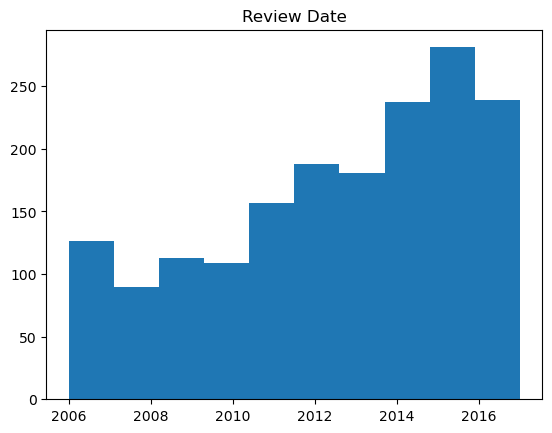

In [51]:
#make some histograms from Date and Rating, won't do too many visuals here
def make_histogram(dataframe, feature):
    plt.hist(dataframe[feature])
    plt.title(feature)
    plt.show()

#make hist for Date
make_histogram(data_copy, 'Review Date')

Slight increase in the number of reviews as time went on

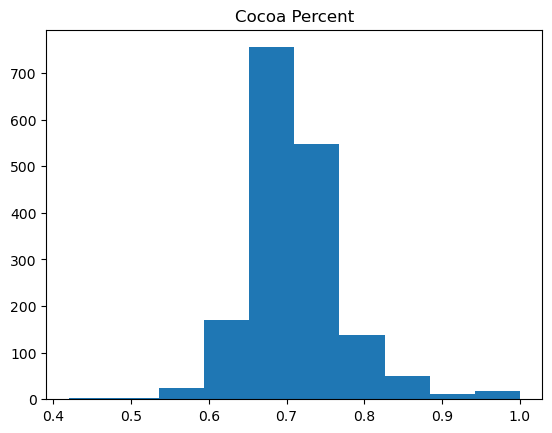

In [52]:
#histogram for percent
make_histogram(data_copy, 'Cocoa Percent')

Data is relatively normal, but kurtosis is present

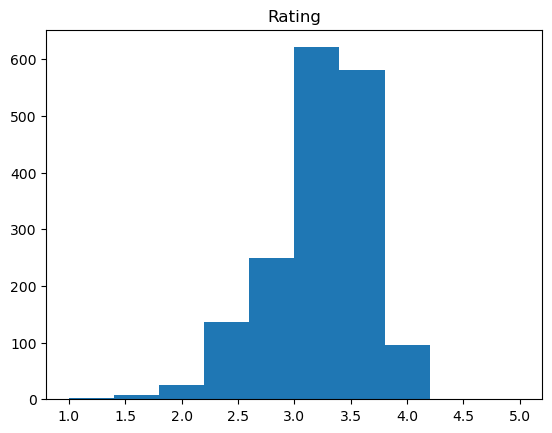

In [53]:
# histogam for rating
make_histogram(data_copy, 'Rating')

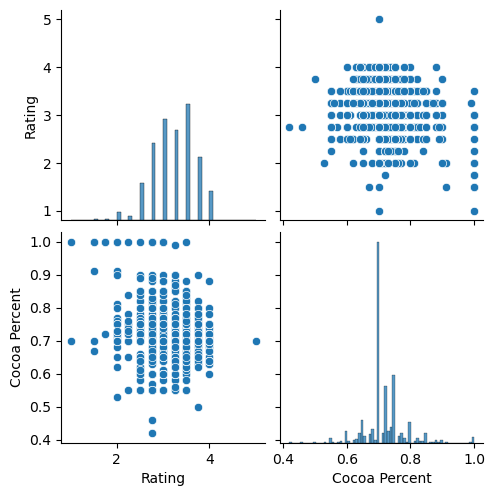

In [13]:
#pair plot with the numerical variables
sns.pairplot(data_copy[['Rating', 'Cocoa Percent']])

Relatively noraml but does skew a bit. No clear linear relationship

Statisitcal tests:
- correlation with ratings and cocoa percent
- Anova for country and ratings and cocoa percent, and bean origin and ratings and cocoa percent
- OLS for ratings

<Axes: >

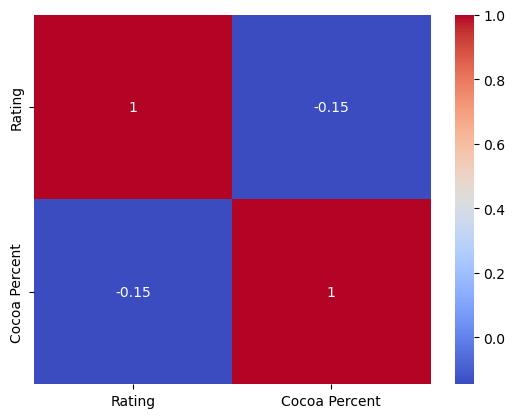

In [56]:
#correlation
correlation = data_copy[['Rating', 'Cocoa Percent']].corr()
sns.heatmap(correlation, cmap='coolwarm', annot=True)

In [23]:
#country df group by country and get mean
country_df = data_copy.groupby('Company Location')['Rating'].mean()
country_df = country_df.reset_index()
country_df

,Company Location,Rating
0,Amsterdam,3.500000
1,Argentina,3.305556
2,Australia,3.380435
3,Austria,3.239130
4,Belgium,3.250000
5,Bolivia,3.250000
6,Brazil,3.397059
7,Canada,3.350427
8,Chile,3.750000
9,Colombia,3.173913


In [38]:
#courtesy of ChatGPT :)

# Create a dictionary to map country names to column names
country_column_map = {country: f'Rating_{country}' for country in country_df['Company Location']} #create map using country df to assign mean rating to country

# Create a list of data arrays for ANOVA
data_arrays = [country_df[country_df['Company Location'] == country]['Rating'].values #create array of values using map created above
               for country in country_column_map.keys()]

In [39]:
#Anova
# need to get all countries
f_statistic, p_value = stats.f_oneway(*data_arrays) #use asterick to unpack array

print(f"ANOVA F-statistic: {f_statistic:.4f}")
print(f"ANOVA p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: At least one group mean is different.")
else:
    print("Fail to reject the null hypothesis: No significant difference among group means.")


ANOVA F-statistic: nan
ANOVA p-value: nan
Fail to reject the null hypothesis: No significant difference among group means.


/tmp/ipykernel_136854/968267724.py:3: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  f_statistic, p_value = stats.f_oneway(*data_arrays) #use asterick to unpack array
